In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [15]:
%%bash
make
mpirun -n 2 Final_Project -n 32 --itermax 1000000 --tol 1e-10 > Final_Project.csv

mpicc -o Final_Project  -I/home/brenton/BSU/ME471/ME471-571/src -I/usr/include -I/home/brenton/BSU/ME471/Final_Project Final_Project.c /home/brenton/BSU/ME471/Final_Project/demo_util.c -lm


iterations: 1565
residual: 9.92129e-11
error: 1.28947
nodes: 289


Text(0.5,0,'Z')

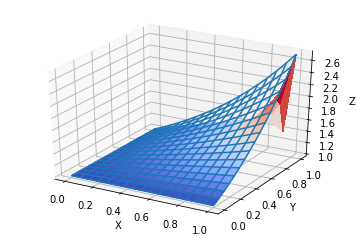

In [16]:
A = np.genfromtxt('Final_Project.csv', delimiter=',')
print("iterations: %d" % A[-3])
print("residual: %g" % A[-2])
print("error: %g" % A[-1])
A = A[:-3]
z = int(np.sqrt(len(A)))
A = A.reshape((z,z))
print("nodes: %d" % (z*z))
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0, 1+1/z, 1/(z-1))
Y = np.arange(0, 1+1/z, 1/(z-1))
X, Y = np.meshgrid(X, Y)
Z = np.exp(X*Y)
surf = ax.plot_surface(X, Y, A, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.view_init(30, 15)